# Feed Forward Neural Networks

In [ ]:
# jupyter notebook

In [ ]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

In [74]:
from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model

# Train

In [2]:
cd C:\weather\data\train

C:\weather\data\train


In [3]:
forders_tr = os.listdir()
forders_tr

['table_202001.csv',
 'table_202002.csv',
 'table_202003.csv',
 'table_202004.csv',
 'table_202005.csv',
 'table_202006.csv',
 'table_202007.csv',
 'table_202008.csv',
 'table_202009.csv',
 'table_202010.csv',
 'table_202011.csv',
 'table_202012.csv',
 'table_202101.csv',
 'table_202102.csv',
 'table_202103.csv',
 'table_202104.csv',
 'table_202105.csv',
 'table_202106.csv']

In [4]:
# 새로운 데이터 프레임 생성
train = pd.DataFrame()

for files in forders_tr:
    df= pd.read_csv(files)
    train = pd.concat([train, df])

In [5]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,2020,1,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,2020,1,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,2020,1,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,2020,1,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,2020,1,1,0,0,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,2021,6,30,23,50,0.000385,1.107697,1.107273,0.000000,0.209894
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,2021,6,30,23,50,0.071010,1.472452,1.488681,0.000000,0.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,2021,6,30,23,50,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,2021,6,30,23,50,-0.365471,0.726721,0.740235,0.000000,0.000000


# Validation

In [6]:
cd C:\weather\data\val

C:\weather\data\val


In [7]:
forders_val = os.listdir()
forders_val

['table_202109.csv',
 'table_202110.csv',
 'table_202111.csv',
 'table_202112.csv']

In [8]:
# 새로운 데이터 프레임 생성
val = pd.DataFrame()

for files in forders_val:
    df= pd.read_csv(files)
    val = pd.concat([val, df])

In [9]:
val

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202109010000,90,128.56473,38.25085,17.9,0.00170,0.00171,0.00238,0.00195,0.00181,...,2021,9,1,0,0,-0.733944,0.000000,0.000000,0.000000,0.508451
1,202109010000,93,127.75443,37.94738,19.0,0.00170,0.00171,0.00149,0.00180,0.00121,...,2021,9,1,0,0,-0.696051,-0.914975,0.447435,0.341129,-0.179931
2,202109010000,95,127.30420,38.14787,17.6,0.00170,0.00228,0.00179,0.00195,0.00151,...,2021,9,1,0,0,-0.279810,0.000000,0.000000,0.000000,-0.365214
3,202109010000,98,127.06070,37.90188,19.3,0.00227,0.00228,0.00238,0.00374,0.00181,...,2021,9,1,0,0,-0.195837,0.000000,0.000000,0.000000,-0.290579
4,202109010000,99,126.76648,37.88589,19.6,0.00227,0.00228,0.00268,0.00239,0.00151,...,2021,9,1,0,0,-0.370219,0.000000,0.000000,0.000000,0.015434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,202112312350,702,126.99435,35.94504,-3.2,-0.00057,-0.00057,-0.00030,-0.00045,-0.00030,...,2021,12,31,23,50,-0.787369,-1.417396,-1.534663,0.000000,0.000000
432626,202112312350,972,128.68340,36.54983,-4.8,-0.00057,0.00057,0.00089,-0.00015,0.00000,...,2021,12,31,23,50,-0.672741,-1.492066,-1.894582,0.000000,1.185870
432627,202112312350,973,126.94961,35.02330,-2.4,0.00000,-0.00057,-0.00179,0.00015,-0.00030,...,2021,12,31,23,50,-0.684352,-0.847900,-0.716603,0.000000,1.525860
432628,202112312350,974,128.15605,35.24435,-1.8,-0.00057,-0.00057,0.00060,-0.00015,0.00000,...,2021,12,31,23,50,-2.065335,-1.364155,-0.756098,0.000000,0.000000


# Test

In [18]:
cd C:\weather\data\test

C:\weather\data\test


In [19]:
forders_te = os.listdir()
forders_te

['table_202107_1.csv', 'table_202108_2.csv']

In [20]:
### 210701~210711, 210821~210831 검증기간(총 22일간)

# 새로운 데이터 프레임 생성
test = pd.DataFrame()

for files in forders_te:
    df= pd.read_csv(files)
    test = pd.concat([test, df])

In [21]:
test

,YearMonthDayHourMinute,STN,Lon,Lat,Band1,Band2,Band3,Band4,Band5,Band6,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202107000000,90,128.56473,38.25085,-0.00057,-0.00057,-0.00149,-0.00045,-0.00060,0.00000,...,2021,7,0,0,0,-0.137869,0.000000,0.000000,0.000000,0.503333
1,202107000000,93,127.75443,37.94738,-0.00057,-0.00057,-0.00119,0.00000,0.00000,-0.00065,...,2021,7,0,0,0,0.115111,-0.141101,0.027567,-0.354792,0.074239
2,202107000000,95,127.30420,38.14787,-0.00057,-0.00057,-0.00060,0.00015,0.00000,-0.00065,...,2021,7,0,0,0,-0.072823,0.000000,0.000000,0.000000,-0.073873
3,202107000000,98,127.06070,37.90188,-0.00057,-0.00057,0.00030,-0.00015,-0.00030,-0.00065,...,2021,7,0,0,0,0.138902,0.000000,0.000000,0.000000,0.065445
4,202107000000,99,126.76648,37.88589,-0.00057,0.00000,-0.00060,-0.00105,0.00000,-0.00065,...,2021,7,0,0,0,0.177468,0.000000,0.000000,0.000000,0.444882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27087,202108000000,973,126.94961,35.02330,0.00000,0.00000,0.00030,0.00015,0.00121,0.00000,...,2021,8,0,0,0,-0.207862,1.366354,0.637043,0.000000,0.664962
27088,202108000000,974,128.15605,35.24435,0.00000,0.00057,0.00000,0.00015,0.00000,0.00000,...,2021,8,0,0,0,-0.559507,1.766315,1.253310,0.000000,0.000000
27089,202108000000,977,127.46688,36.72455,0.00000,0.00057,-0.00179,0.00030,0.00000,0.00000,...,2021,8,0,0,0,-0.449989,-0.705848,-0.467874,0.000000,0.000000
27090,202108000000,978,127.77626,37.95461,0.00000,0.00000,0.00089,0.00015,-0.00030,0.00000,...,2021,8,0,0,0,-0.374500,-1.392848,-0.768451,0.000000,0.000000


# Submission

In [22]:
cd C:\weather\data

C:\weather\data


In [23]:
# Set Pandas options to display more columns
# pd.options.display.max_columns=50
submission=pd.read_csv('1-2_검증데이터셋.csv', encoding='utf-8')
submission

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


# 모델 Train

In [25]:
train

,YearMonthDayHourMinute,STN,Lon,Lat,isitu-LST,Band1,Band2,Band3,Band4,Band5,...,Year,Month,Day,Hour,Minute,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,202001010000,90,128.56473,38.25085,-2.6,0.00000,0.00000,-0.00060,-0.00030,-0.0003,...,2020,1,1,0,0,0.422121,0.000000,0.000000,0.000000,0.868476
1,202001010000,95,127.30420,38.14787,-2.6,-0.00057,-0.00057,0.00030,-0.00060,-0.0003,...,2020,1,1,0,0,-0.391234,0.000000,0.000000,0.000000,1.114533
2,202001010000,98,127.06070,37.90188,-3.1,0.00000,0.00000,0.00030,0.00060,-0.0003,...,2020,1,1,0,0,-0.355405,0.000000,0.000000,0.000000,1.315872
3,202001010000,99,126.76648,37.88589,-3.4,-0.00057,-0.00057,-0.00030,0.00015,0.0000,...,2020,1,1,0,0,-0.332510,0.000000,0.000000,0.000000,1.666385
4,202001010000,101,127.73570,37.90262,-3.6,-0.00057,0.00000,0.00030,0.00030,0.0000,...,2020,1,1,0,0,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,202106302350,973,126.94961,35.02330,23.6,-0.00057,-0.00057,-0.00179,-0.00060,-0.0003,...,2021,6,30,23,50,0.000385,1.107697,1.107273,0.000000,0.209894
447706,202106302350,974,128.15605,35.24435,20.7,0.00000,-0.00057,0.00089,0.00015,0.0000,...,2021,6,30,23,50,0.071010,1.472452,1.488681,0.000000,0.000000
447707,202106302350,977,127.46688,36.72455,23.9,-0.00057,-0.00057,-0.00060,0.00015,0.0000,...,2021,6,30,23,50,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,202106302350,978,127.77626,37.95461,23.2,-0.00057,0.00000,0.00030,-0.00075,-0.0003,...,2021,6,30,23,50,-0.365471,0.726721,0.740235,0.000000,0.000000


In [28]:
##### Step 1 - Select data for modeling(training data & validation data
X_train = train.drop(['Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','GK2A-LST', \
           'insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)
X_test = val.drop(['Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','GK2A-LST', \
           'insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat','isitu-LST','insitu-TA'], axis=1)

y_train=train[['isitu-LST', 'insitu-TA']].values
y_test=val[['isitu-LST', 'insitu-TA']].values

X_train

,Band1,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,insitu-TED0.05,insitu-TED0.1,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,0.00000,162.63634,44.52481,-9.38141,17.53,2,30.3,-17.7,-4.2,-999.0,-999.0,0.422121,0.000000,0.000000,0.000000,0.868476
1,-0.00057,162.17793,44.41427,-9.36082,155.48,2,64.1,-14.5,-7.9,-999.0,-999.0,-0.391234,0.000000,0.000000,0.000000,1.114533
2,0.00000,162.27711,44.13104,-9.36664,115.62,2,58.4,-14.7,-7.4,-999.0,-999.0,-0.355405,0.000000,0.000000,0.000000,1.315872
3,-0.00057,162.14729,44.12316,-9.36060,30.59,2,52.8,-15.4,-6.5,-999.0,-999.0,-0.332510,0.000000,0.000000,0.000000,1.666385
4,-0.00057,162.57755,44.12761,-9.38050,75.82,3,66.0,-14.3,-14.1,-0.5,-0.6,-0.188191,-1.022277,-0.499305,0.114355,1.402172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447705,-0.00057,120.35766,40.87855,-4.18556,39.64,2,96.9,20.0,19.4,26.7,26.6,0.000385,1.107697,1.107273,0.000000,0.209894
447706,0.00000,120.38888,41.10588,-4.21799,16.78,2,93.5,18.7,-999.0,26.2,27.1,0.071010,1.472452,1.488681,0.000000,0.000000
447707,-0.00057,118.81387,42.79873,-3.99159,40.35,2,98.3,21.6,21.9,26.7,26.3,-0.144802,1.049685,1.210674,0.000000,0.000000
447708,-0.00057,117.67587,44.18884,-3.84460,140.37,2,95.9,20.1,19.2,25.3,26.0,-0.365471,0.726721,0.740235,0.000000,0.000000


In [29]:
X_test

,Band1,SolarZA,SateZA,ESR,Height,LandType,insitu-HM,insitu-TD,insitu-TG,insitu-TED0.05,insitu-TED0.1,mean_6_23,mean_34_37,mean_38_39,mean_40_42,mean_43_44
0,0.00170,132.65269,44.52481,-6.38871,17.53,2,97.3,16.9,17.8,-999.0,-999.0,-0.733944,0.000000,0.000000,0.000000,0.508451
1,0.00170,132.82147,44.16866,-6.41119,95.78,3,98.5,17.5,17.5,20.3,21.1,-0.696051,-0.914975,0.447435,0.341129,-0.179931
2,0.00170,132.53152,44.41427,-6.37791,155.48,2,100.0,17.1,17.1,-999.0,-999.0,-0.279810,0.000000,0.000000,0.000000,-0.365214
3,0.00227,132.73465,44.13104,-6.40288,115.62,2,99.9,17.7,18.1,-999.0,-999.0,-0.195837,0.000000,0.000000,0.000000,-0.290579
4,0.00227,132.69038,44.12316,-6.39848,30.59,2,99.8,17.7,18.0,-999.0,-999.0,-0.370219,0.000000,0.000000,0.000000,0.015434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432625,-0.00057,162.38597,41.92041,-8.86355,15.12,2,82.1,-10.7,-9.7,0.1,0.6,-0.787369,-1.417396,-1.534663,0.000000,0.000000
432626,-0.00057,162.89288,42.59904,-8.93360,88.62,2,40.1,-17.3,-8.5,0.2,0.1,-0.672741,-1.492066,-1.894582,0.000000,1.185870
432627,0.00000,162.98303,40.87855,-8.88743,39.64,2,53.4,-11.7,-4.8,2.3,2.0,-0.684352,-0.847900,-0.716603,0.000000,1.525860
432628,-0.00057,163.56012,41.10588,-8.94638,16.78,2,36.2,-15.7,-999.0,0.6,0.8,-2.065335,-1.364155,-0.756098,0.000000,0.000000


In [32]:
##### Step 2 - Create training and testing samples
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


##### Step 3 - Specify the structure of a neural network
model2 = Sequential(name="Model-with-Two-Inputs")
model2.add(Input(shape=(len(X_train.columns),), name='Input-Layer'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer1'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer2'))
model2.add(Dense(len(X_train.columns), activation='relu', name='Hidden-Layer3'))
model2.add(Dense(2, activation='relu', name='Output-Layer'))


##### Step 4 - Compile the keras model
model2.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None, 
              steps_per_execution=None 
             )

model2.summary()

Model: "Model-with-Two-Inputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 16)                272       
                                                                 
 Hidden-Layer2 (Dense)       (None, 16)                272       
                                                                 
 Hidden-Layer3 (Dense)       (None, 16)                272       
                                                                 
 Output-Layer (Dense)        (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [46]:
cd C:\weather

C:\weather


In [47]:
os.getcwd()

'C:\\weather'

In [55]:
##### Step 5 - Fit keras model on the dataset

# Set Directory
save_dir = os.path.join(os.getcwd(),'save')

model_name = 'model2.{epoch:02d}.h5' 
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)


checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_mse',
                             verbose=1,
                             save_best_only=False)

callbacks = checkpoint                   # 추후에는 best 부분만 저장해도 될듯함(model weight)

In [56]:
hist = model2.fit(X_train.to_numpy(),       # input data
          y_train,                 # target data
          batch_size=32,    
          epochs=100,         # 늘려야 할 부분     
          validation_data=(X_test, y_test),
          shuffle=True,
          callbacks=callbacks)

Epoch 1/100
256298/256334 [============================>.] - ETA: 0s - loss: 3.9916 - mse: 3.9916
Epoch 1: saving model to C:\weather\save\model2.01.h5
256334/256334 [==============================] - 152s 594us/step - loss: 3.9915 - mse: 3.9915 - val_loss: 2.9925 - val_mse: 2.9925
Epoch 2/100
256256/256334 [============================>.] - ETA: 0s - loss: 3.9557 - mse: 3.9557
Epoch 2: saving model to C:\weather\save\model2.02.h5
256334/256334 [==============================] - 148s 577us/step - loss: 3.9557 - mse: 3.9557 - val_loss: 2.9393 - val_mse: 2.9393
Epoch 3/100
256323/256334 [============================>.] - ETA: 0s - loss: 3.9218 - mse: 3.9218
Epoch 3: saving model to C:\weather\save\model2.03.h5
256334/256334 [==============================] - 144s 563us/step - loss: 3.9218 - mse: 3.9218 - val_loss: 2.8876 - val_mse: 2.8876
Epoch 4/100
256248/256334 [============================>.] - ETA: 0s - loss: 3.8961 - mse: 3.8961
Epoch 4: saving model to C:\weather\save\model2.04.h5

Epoch 30/100
256298/256334 [============================>.] - ETA: 0s - loss: 3.7192 - mse: 3.7192
Epoch 30: saving model to C:\weather\save\model2.30.h5
256334/256334 [==============================] - 150s 584us/step - loss: 3.7192 - mse: 3.7192 - val_loss: 2.6980 - val_mse: 2.6980
Epoch 31/100
256277/256334 [============================>.] - ETA: 0s - loss: 3.7166 - mse: 3.7166
Epoch 31: saving model to C:\weather\save\model2.31.h5
256334/256334 [==============================] - 150s 583us/step - loss: 3.7166 - mse: 3.7166 - val_loss: 2.6773 - val_mse: 2.6773
Epoch 32/100
256241/256334 [============================>.] - ETA: 0s - loss: 3.7215 - mse: 3.7215
Epoch 32: saving model to C:\weather\save\model2.32.h5
256334/256334 [==============================] - 147s 575us/step - loss: 3.7215 - mse: 3.7215 - val_loss: 2.6590 - val_mse: 2.6590
Epoch 33/100
256284/256334 [============================>.] - ETA: 0s - loss: 3.7106 - mse: 3.7106
Epoch 33: saving model to C:\weather\save\mode

Epoch 59/100
256283/256334 [============================>.] - ETA: 0s - loss: 3.6209 - mse: 3.6209
Epoch 59: saving model to C:\weather\save\model2.59.h5
256334/256334 [==============================] - 152s 593us/step - loss: 3.6209 - mse: 3.6209 - val_loss: 3.0466 - val_mse: 3.0466
Epoch 60/100
256281/256334 [============================>.] - ETA: 0s - loss: 3.6224 - mse: 3.6224
Epoch 60: saving model to C:\weather\save\model2.60.h5
256334/256334 [==============================] - 149s 580us/step - loss: 3.6225 - mse: 3.6225 - val_loss: 2.6464 - val_mse: 2.6464
Epoch 61/100
256287/256334 [============================>.] - ETA: 0s - loss: 3.6226 - mse: 3.6226
Epoch 61: saving model to C:\weather\save\model2.61.h5
256334/256334 [==============================] - 152s 591us/step - loss: 3.6228 - mse: 3.6228 - val_loss: 2.6811 - val_mse: 2.6811
Epoch 62/100
256276/256334 [============================>.] - ETA: 0s - loss: 3.6206 - mse: 3.6206
Epoch 62: saving model to C:\weather\save\mode

Epoch 88/100
256243/256334 [============================>.] - ETA: 0s - loss: 3.6318 - mse: 3.6318
Epoch 88: saving model to C:\weather\save\model2.88.h5
256334/256334 [==============================] - 152s 594us/step - loss: 3.6317 - mse: 3.6317 - val_loss: 2.6623 - val_mse: 2.6623
Epoch 89/100
256233/256334 [============================>.] - ETA: 0s - loss: 3.6279 - mse: 3.6279
Epoch 89: saving model to C:\weather\save\model2.89.h5
256334/256334 [==============================] - 150s 585us/step - loss: 3.6281 - mse: 3.6281 - val_loss: 2.7048 - val_mse: 2.7048
Epoch 90/100
256248/256334 [============================>.] - ETA: 0s - loss: 3.6289 - mse: 3.6289
Epoch 90: saving model to C:\weather\save\model2.90.h5
256334/256334 [==============================] - 152s 594us/step - loss: 3.6289 - mse: 3.6289 - val_loss: 2.6669 - val_mse: 2.6669
Epoch 91/100
256321/256334 [============================>.] - ETA: 0s - loss: 3.6266 - mse: 3.6266
Epoch 91: saving model to C:\weather\save\mode

In [125]:
# with open('save', 'wb') as file_pi:
#         pickle.dump(hist.history, file_pi)
# history = pickle.load(open('save', "rb"))

In [62]:
model2.save('model_0622.h5')

In [63]:
# model2 = load_model('model_0622.h5')

In [64]:
# model2.summary()

Model: "Model-with-Two-Inputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer1 (Dense)       (None, 16)                272       
                                                                 
 Hidden-Layer2 (Dense)       (None, 16)                272       
                                                                 
 Hidden-Layer3 (Dense)       (None, 16)                272       
                                                                 
 Output-Layer (Dense)        (None, 2)                 34        
                                                                 
Total params: 850
Trainable params: 850
Non-trainable params: 0
_________________________________________________________________


In [65]:
# model2.predict(X_test)

55630/55630 [==============================] - 23s 406us/step


array([[18.324244 , 17.326216 ],
       [18.382547 , 18.010893 ],
       [17.964062 , 16.98561  ],
       ...,
       [ 0.       ,  0.       ],
       [ 0.       ,  0.       ],
       [ 3.7202678,  3.907033 ]], dtype=float32)

In [68]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(hist.history) 

# or save to csv: 
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [69]:
hh = pd.read_csv('history.csv')
hh

,Unnamed: 0,loss,mse,val_loss,val_mse
0,0,3.991510,3.991510,2.992495,2.992495
1,1,3.955704,3.955704,2.939269,2.939269
2,2,3.921806,3.921806,2.887628,2.887628
3,3,3.896065,3.896065,2.990516,2.990516
4,4,3.871202,3.871202,3.110880,3.110880
...,...,...,...,...,...
95,95,3.630301,3.630301,2.667284,2.667284
96,96,3.628376,3.628376,2.647987,2.647987
97,97,3.631196,3.631196,2.827351,2.827351
98,98,3.633182,3.633182,2.739593,2.739593


# 시각화

Loss

In [123]:
def Plot_history(history):
  plt.subplot(211)
  plt.plot(hist.history['loss'], color = 'b', label = 'train')
  plt.plot(hist.history['val_loss'], color = 'g', label = 'test')
  plt.ylabel('Loss')
  plt.legend()

#   plt.subplot(212)
#   plt.plot(hist.history['mse'], color = 'r', label = 'train')
#   plt.plot(hist.history['val_mse'], color = 'black', label = 'test')
#   plt.xlabel('Epoch')
#   plt.ylabel('mse')
#   plt.legend()
#   plt.show()  

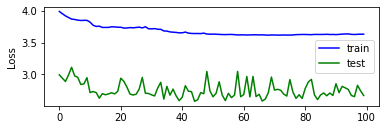

In [124]:
Plot_history(hist)

In [79]:
scores = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test mse:', scores[1])

Test loss: 2.6667864322662354
Test mse: 2.6667864322662354


LST,TA

In [ ]:
# LST,TA 얼마나 잘 맞췄는지 겹쳐 그래프도 그리기

In [81]:
pred_te = model2.predict(X_test)
pred_te

55630/55630 [==============================] - 24s 424us/step


array([[18.324244 , 17.326216 ],
       [18.382547 , 18.010893 ],
       [17.964062 , 16.98561  ],
       ...,
       [ 0.       ,  0.       ],
       [ 0.       ,  0.       ],
       [ 3.7202678,  3.907033 ]], dtype=float32)

In [85]:
lst_pr = []
ta_pr = []
for i in range(len(pred_te)):
    lst_pr.append(pred_te[i][0])
    ta_pr.append(pred_te[i][1])

In [86]:
lst_re = []
ta_re = []
for i in range(len(y_test)):
    lst_re.append(y_test[i][0])
    ta_re.append(y_test[i][1])

In [115]:
def value_compare():
  plt.subplot(211)
  plt.plot(lst_pr[500:550], color = 'b', label = 'pred')
  plt.plot(lst_re[500:550], color = 'g', label = 'real')
  plt.ylabel('LST')
  plt.legend()

  plt.subplot(212)
  plt.plot(ta_pr[700:750], color = 'r', label = 'pred')
  plt.plot(ta_re[700:750], color = 'black', label = 'real')
  plt.ylabel('TA')
  plt.legend()
  plt.show()  

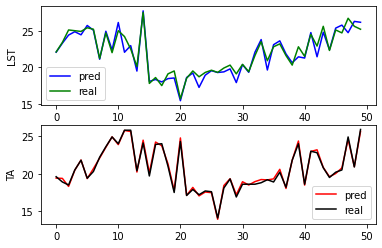

In [116]:
value_compare()

# 예측 값 파일에 저장

In [127]:
test_ = test.drop(['Band2','Band3','Band4','Band5','Band6','Band7','Band8','Band9','Band10','Band11','Band12', \
            'Band13','Band14','Band15','Band16','30daysBand3','30daysBand13','GK2A-LST', \
           'insitu-TED0.2','insitu-TED0.3','insitu-TED0.5','insitu-TED1.0','insitu-TED1.5','insitu-TED3.0', \
           'insitu-TED5.0','insitu-PA','insitu-PS','Year','Month','Day','Hour','Minute','YearMonthDayHourMinute', \
           'STN','Lon','Lat'], axis=1)

In [128]:
pred = model2.predict(test_)
pred

1704/1704 [==============================] - 1s 434us/step


array([[21.519955, 21.045914],
       [21.090595, 20.941137],
       [20.151451, 19.108765],
       ...,
       [22.37016 , 20.609022],
       [19.06251 , 17.77422 ],
       [27.448708, 24.680088]], dtype=float32)

In [129]:
submission1 = submission.copy()
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,NaN,NaN
1,202107010030,93,NaN,NaN
2,202107010030,95,NaN,NaN
3,202107010030,98,NaN,NaN
4,202107010030,99,NaN,NaN
...,...,...,...,...
54498,202108312330,973,NaN,NaN
54499,202108312330,974,NaN,NaN
54500,202108312330,977,NaN,NaN
54501,202108312330,978,NaN,NaN


In [130]:
submission1[['isitu-LST', 'insitu-TA']] = pred
submission1

,YearMonthDayHourMinute,STN,isitu-LST,insitu-TA
0,202107010030,90,21.519955,21.045914
1,202107010030,93,21.090595,20.941137
2,202107010030,95,20.151451,19.108765
3,202107010030,98,20.608101,19.730473
4,202107010030,99,20.895721,20.169319
...,...,...,...,...
54498,202108312330,973,25.855419,24.433647
54499,202108312330,974,21.959743,24.037659
54500,202108312330,977,22.370159,20.609022
54501,202108312330,978,19.062510,17.774220


In [131]:
cd C:\weather

C:\weather


In [132]:
submission1.to_csv("220224.csv", index = False)    # 접수번호로 저장